In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def prediction(X, coefficient, intercept):
    return X*coefficient + intercept

In [3]:
#cost function
def cost_function(X, Y, coefficient, intercept):
    MSE = 0 
    for i in range(len(X)):
        MSE += (Y[i] - (X[i]*coefficient + intercept))**2
    return MSE/len(X)

In [41]:
#gradient descent to update the weights
def update_weights(X, Y, coefficient, intercept, learning_rate):
    coefficient_derivative = 0 
    intercept_derivative = 0 
    
    for i in range(len(X)):
        coefficient_derivative += -2 * X[i] * (Y[i] - (coefficient * X[i] + intercept))
        intercept_derivative += -2 * (Y[i] - (coefficient * X[i] + intercept))
        
    coefficient -= learning_rate * (coefficient_derivative/len(X))
    intercept -= learning_rate * (intercept_derivative/len(X))
    
    return coefficient, intercept

In [42]:
#main function
def train(X, Y, coefficient, intercept, learning_rate, iteration):
    cost_hist = []
    for i in range(iteration):
        coefficient, intercept = update_weights(X, Y, coefficient, intercept, learning_rate)
        #print(coefficient, intercept)
        cost = cost_function(X, Y, coefficient, intercept)
        cost_hist.append(cost)
    return coefficient, intercept, cost_hist
        

In [43]:
from sklearn.datasets import load_boston
dataset = load_boston()
bostondf = pd.DataFrame(dataset.data)
bostondf.columns = dataset.feature_names
bostondf['Target Price'] = dataset.target
bostondf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [44]:
learning_rate = 0.01
iteration = 10001
coefficient = 0.3
intercept = 2 
X = bostondf.iloc[:, 5:6].values

In [45]:
Y = bostondf.iloc[:, 13:14].values

In [46]:
coefficient, intercept, cost_hist = train(X, Y, coefficient, intercept, learning_rate, iteration)

In [47]:
coefficient

array([4.51202081])

In [48]:
intercept

array([-5.47252822])

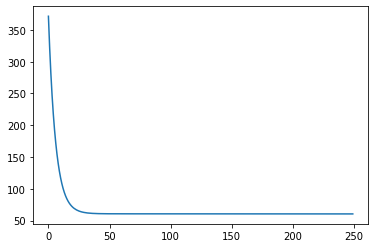

In [51]:
plt.plot(cost_hist[:250])
plt.show()

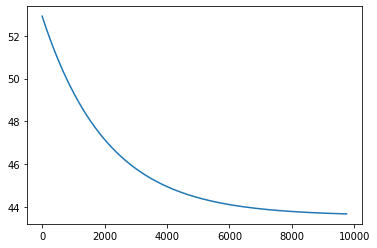

In [60]:
plt.plot(cost_hist[250:])
plt.show()

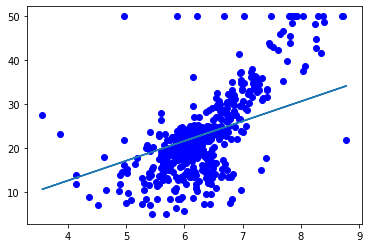

In [52]:
y_hat = X*coefficient + intercept
plt.plot(X, Y, 'bo')
plt.plot(X, y_hat)
plt.show()

In [53]:
learning_rate = 0.01
coefficient, intercept, cost_hist = train(X, Y, coefficient, intercept, learning_rate, iteration)

In [54]:
coefficient

array([8.68788693])

In [55]:
intercept

array([-32.0357054])

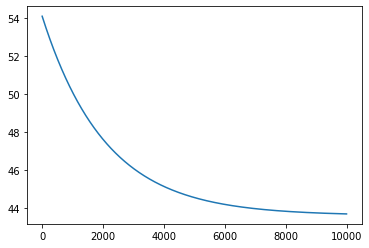

In [58]:
plt.plot(cost_hist)
plt.show()

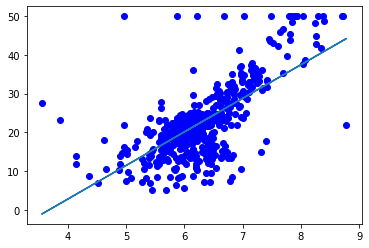

In [59]:
y_hat = X*coefficient + intercept
plt.plot(X, Y, 'bo')
plt.plot(X, y_hat)
plt.show()